## title: "Case Study 1 -Bike-share"
### author: "Breanyl Baker"
### date: "2023-07-29"

#### This case study was given at the end of my Google Data Analytics Professional Certificate. 
#### I was tasked to to identify the difference between casual riders and annual members' usage of Cyclistc bikes.

**Load the packages needed.**

In [1]:
library(tidyverse)
library(dplyr)
library(chron)
library(ggplot2)
library(hms)
library(lubridate)
library(skimr)
library(tibble)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘chron’


The following objects are masked from ‘package:lubridate’:

    days, hours, minutes, seconds, years



Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




**Read in the merged dataset which has the past 12 months of trip data**

In [2]:
full_trip_data <- data.frame(read_csv("/kaggle/input/full-trip-data/full_trip_data.csv"))
View(full_trip_data)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 5413031 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (5): start_lat, start_lng, end_lat, end_lng, day_of_week
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ride_id          rideable_type started_at      ended_at       
1       954144C2F67B1932 classic_bike  7/5/2022 8:12   7/5/2022 8:24  
2       292E027607D218B6 classic_bike  7/26/2022 12:53 7/26/2022 12:55
3       57765852588AD6E0 classic_bike  7/3/2022 13:58  7/3/2022 14:06 
4       B5B6BE44314590E6 classic_bike  7/31/2022 17:44 7/31/2022 18:42
5       A4C331F2A00E79E0 classic_bike  7/13/2022 19:49 7/13/2022 20:15
6       579D73BE2ED880B3 electric_bike 7/1/2022 17:04  7/1/2022 17:13 
7       EFE518CCEE333669 classic_bike  7/18/2022 18:11 7/18/2022 18:22
8       315FEBB7B3F6D2EA classic_bike  7/28/2022 20:38 7/28/2022 21:09
9       EE3C4A1E66766B56 classic_bike  7/10/2022 22:55 7/10/2022 23:01
10      1EE6C93A547A187C electric_bike 7/10/2022 9:35  7/10/2022 9:47 
11      7B4A08D6BE95036C classic_bike  7/8/2022 6:59   7/8/2022 7:17  
12      500A6DD847842B16 classic_bike  7/16/2022 12:39 7/16/2022 13:06
13      830F240669F948AA classic_bike  7/19/2022 7:15  7/19/2022 7:38 
14      3ABD363B1FDD7695 classic_bike  7/27/2022 14:24 7/27/2022 14:35
15      A44789A8D5BF9275 electric_bike 7/18/2022 21:48 7/18/2022 21:53
16      AE39BB870B51EEBE electric_bike 7/24/2022 14:34 7/24/2022 14:41
17      E2094171B3BC3331 electric_bike 7/21/2022 16:28 7/21/2022 16:42
18      9DF4D78A832BEF32 classic_bike  7/14/2022 18:05 7/14/2022 18:16
19      92D9E449193E885A electric_bike 7/24/2022 16:00 7/24/2022 16:19
20      608AF9C76A704AA2 electric_bike 7/29/2022 21:16 7/29/2022 21:35
21      3327BC0B2FC92863 docked_bike   7/24/2022 19:07 7/24/2022 19:32
22      CEA15603B604BC08 classic_bike  7/18/2022 7:54  7/18/2022 8:08 
23      35A5F7623C54CB4A electric_bike 7/22/2022 21:22 7/22/2022 21:32
24      3D599218CAFFCFAA electric_bike 7/9/2022 12:13  7/9/2022 12:24 
25      BC615FBD774438AC classic_bike  7/22/2022 19:39 7/22/2022 20:06
26      55661F65ED2D1B17 docked_bike   7/4/2022 9:32   7/4/2022 10:44 
27      A1A26DCD5E0D5CD8 classic_bike  7/30/2022 14:44 7/30/2022 15:25
28      17707F91324B6B2A electric_bike 7/11/2022 14:00 7/11/2022 14:03
29      BFF46F476F5FE294 classic_bike  7/20/2022 6:36  7/20/2022 6:54 
30      DBA6BF86FC23B1F3 classic_bike  7/31/2022 15:42 7/31/2022 15:42
⋮       ⋮                ⋮             ⋮               ⋮              
5413002 1F8EFDE1376F25FF electric_bike 6/11/2023 15:41 6/11/2023 15:44
5413003 49271544CC783FE5 electric_bike 6/7/2023 17:59  6/7/2023 18:10 
5413004 F203F7BEAF3E4771 classic_bike  6/12/2023 14:01 6/12/2023 14:10
5413005 B00206C894FBDD04 electric_bike 6/10/2023 11:00 6/10/2023 11:20
5413006 BD32F7685A80BDC6 electric_bike 6/3/2023 9:35   6/3/2023 9:43  
5413007 98E452D078CF3C5B electric_bike 6/22/2023 18:09 6/22/2023 18:39
5413008 5BE97EC518D5D7D3 electric_bike 6/22/2023 10:29 6/22/2023 10:37
5413009 33BF337BBBD84C83 electric_bike 6/29/2023 8:52  6/29/2023 9:00 
5413010 A92466390C9C3BCC electric_bike 6/30/2023 8:50  6/30/2023 8:58 
5413011 C458D30F027890D6 electric_bike 6/26/2023 18:12 6/26/2023 18:22
5413012 A0A0B105EA4FBDE0 electric_bike 6/12/2023 9:06  6/12/2023 9:23 
5413013 4CA5788FB7BBB534 electric_bike 6/29/2023 17:55 6/29/2023 18:01
5413014 B986F4118F09316A electric_bike 6/9/2023 16:16  6/9/2023 16:30 
5413015 2CF011F331FAC616 electric_bike 6/12/2023 16:48 6/12/2023 16:52
5413016 AF036A8A8EBF731E docked_bike   6/10/2023 11:56 6/15/2023 4:57 
5413017 A04CE14C2195E790 electric_bike 6/23/2023 14:03 6/23/2023 14:07
5413018 6B5529395EB391D4 electric_bike 6/20/2023 18:34 6/20/2023 18:48
5413019 ED79A3138259D178 electric_bike 6/19/2023 21:25 6/19/2023 21:29
5413020 0EE85D6F1AFC19BC electric_bike 6/20/2023 8:52  6/20/2023 9:03 
5413021 D1155E659D1D05EB electric_bike 6/19/2023 22:19 6/19/2023 22:28
5413022 50D571C70A6F0C04 electric_bike 6/24/2023 21:16 6/24/2023 22:41
5413023 A5ACBE3821F73016 electric_bike 6/25/2023 13:29 6/25/2023 13:43
5413024 D3694ABFD7ECDECB electric_bike 6/24/2023 23:38 6/25/2023 0:23 
5413025 04D745E887D17A4D electric_bike 6/22/2023 21:32 6/22/2023 21:53
5413026 CDA9ABCD7DA3AE4C electri

**Looking at the data structure.**

In [3]:
head(full_trip_data)
glimpse(full_trip_data)
colnames(full_trip_data)

ride_id          rideable_type started_at      ended_at       
1 954144C2F67B1932 classic_bike  7/5/2022 8:12   7/5/2022 8:24  
2 292E027607D218B6 classic_bike  7/26/2022 12:53 7/26/2022 12:55
3 57765852588AD6E0 classic_bike  7/3/2022 13:58  7/3/2022 14:06 
4 B5B6BE44314590E6 classic_bike  7/31/2022 17:44 7/31/2022 18:42
5 A4C331F2A00E79E0 classic_bike  7/13/2022 19:49 7/13/2022 20:15
6 579D73BE2ED880B3 electric_bike 7/1/2022 17:04  7/1/2022 17:13 
  start_station_name          start_station_id end_station_name              
1 Ashland Ave & Blackhawk St  13224            Kingsbury St & Kinzie St      
2 Buckingham Fountain (Temp)  15541            Michigan Ave & 8th St         
3 Buckingham Fountain (Temp)  15541            Michigan Ave & 8th St         
4 Buckingham Fountain (Temp)  15541            Woodlawn Ave & 55th St        
5 Wabash Ave & Grand Ave      TA1307000117     Sheffield Ave & Wellington Ave
6 Desplaines St & Randolph St 15535            Clinton St & Roosevelt Rd     
  end_station_id start_lat start_lng end_lat  end_lng   member_casual
1 KA1503000043   41.90707  -87.66725 41.88918 -87.63851 member       
2 623            41.86962  -87.62398 41.87277 -87.62398 casual       
3 623            41.86962  -87.62398 41.87277 -87.62398 casual       
4 TA1307000164   41.86962  -87.62398 41.79526 -87.59647 casual       
5 TA1307000052   41.89147  -87.62676 41.93625 -87.65266 member       
6 WL-008         41.88461  -87.64456 41.86712 -87.64109 member       
  ride_length day_of_week
1 00:12:00    3          
2 00:02:00    3          
3 00:08:00    1          
4 00:58:00    1          
5 00:26:00    4          
6 00:09:00    6

Rows: 5,413,031
Columns: 15
$ ride_id            <chr> "954144C2F67B1932", "292E027607D218B6", "5776585258…
$ rideable_type      <chr> "classic_bike", "classic_bike", "classic_bike", "cl…
$ started_at         <chr> "7/5/2022 8:12", "7/26/2022 12:53", "7/3/2022 13:58…
$ ended_at           <chr> "7/5/2022 8:24", "7/26/2022 12:55", "7/3/2022 14:06…
$ start_station_name <chr> "Ashland Ave & Blackhawk St", "Buckingham Fountain …
$ start_station_id   <chr> "13224", "15541", "15541", "15541", "TA1307000117",…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Michigan Ave & 8th St"…
$ end_station_id     <chr> "KA1503000043", "623", "623", "TA1307000164", "TA13…
$ start_lat          <dbl> 41.90707, 41.86962, 41.86962, 41.86962, 41.89147, 4…
$ start_lng          <dbl> -87.66725, -87.62398, -87.62398, -87.62398, -87.626…
$ end_lat            <dbl> 41.88918, 41.87277, 41.87277, 41.79526, 41.93625, 4…
$ end_lng            <dbl> -87.63851, -87.62398, -87.62398, -87.59647, -87.652…
$ member_cas

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

**Checking if there are any missing values after merging.**

In [4]:
any(is.na(full_trip_data))

[1] TRUE

**Created a dataframe with the data columns that will be in use for this analysis.**

In [5]:
{trip_subdata <- subset(full_trip_data, 
                        select = c(ride_id, rideable_type, started_at,
                                    ended_at,member_casual,ride_length,day_of_week))}
View(trip_subdata)

ride_id          rideable_type started_at      ended_at       
1       954144C2F67B1932 classic_bike  7/5/2022 8:12   7/5/2022 8:24  
2       292E027607D218B6 classic_bike  7/26/2022 12:53 7/26/2022 12:55
3       57765852588AD6E0 classic_bike  7/3/2022 13:58  7/3/2022 14:06 
4       B5B6BE44314590E6 classic_bike  7/31/2022 17:44 7/31/2022 18:42
5       A4C331F2A00E79E0 classic_bike  7/13/2022 19:49 7/13/2022 20:15
6       579D73BE2ED880B3 electric_bike 7/1/2022 17:04  7/1/2022 17:13 
7       EFE518CCEE333669 classic_bike  7/18/2022 18:11 7/18/2022 18:22
8       315FEBB7B3F6D2EA classic_bike  7/28/2022 20:38 7/28/2022 21:09
9       EE3C4A1E66766B56 classic_bike  7/10/2022 22:55 7/10/2022 23:01
10      1EE6C93A547A187C electric_bike 7/10/2022 9:35  7/10/2022 9:47 
11      7B4A08D6BE95036C classic_bike  7/8/2022 6:59   7/8/2022 7:17  
12      500A6DD847842B16 classic_bike  7/16/2022 12:39 7/16/2022 13:06
13      830F240669F948AA classic_bike  7/19/2022 7:15  7/19/2022 7:38 
14      3ABD363B1FDD7695 classic_bike  7/27/2022 14:24 7/27/2022 14:35
15      A44789A8D5BF9275 electric_bike 7/18/2022 21:48 7/18/2022 21:53
16      AE39BB870B51EEBE electric_bike 7/24/2022 14:34 7/24/2022 14:41
17      E2094171B3BC3331 electric_bike 7/21/2022 16:28 7/21/2022 16:42
18      9DF4D78A832BEF32 classic_bike  7/14/2022 18:05 7/14/2022 18:16
19      92D9E449193E885A electric_bike 7/24/2022 16:00 7/24/2022 16:19
20      608AF9C76A704AA2 electric_bike 7/29/2022 21:16 7/29/2022 21:35
21      3327BC0B2FC92863 docked_bike   7/24/2022 19:07 7/24/2022 19:32
22      CEA15603B604BC08 classic_bike  7/18/2022 7:54  7/18/2022 8:08 
23      35A5F7623C54CB4A electric_bike 7/22/2022 21:22 7/22/2022 21:32
24      3D599218CAFFCFAA electric_bike 7/9/2022 12:13  7/9/2022 12:24 
25      BC615FBD774438AC classic_bike  7/22/2022 19:39 7/22/2022 20:06
26      55661F65ED2D1B17 docked_bike   7/4/2022 9:32   7/4/2022 10:44 
27      A1A26DCD5E0D5CD8 classic_bike  7/30/2022 14:44 7/30/2022 15:25
28      17707F91324B6B2A electric_bike 7/11/2022 14:00 7/11/2022 14:03
29      BFF46F476F5FE294 classic_bike  7/20/2022 6:36  7/20/2022 6:54 
30      DBA6BF86FC23B1F3 classic_bike  7/31/2022 15:42 7/31/2022 15:42
⋮       ⋮                ⋮             ⋮               ⋮              
5413002 1F8EFDE1376F25FF electric_bike 6/11/2023 15:41 6/11/2023 15:44
5413003 49271544CC783FE5 electric_bike 6/7/2023 17:59  6/7/2023 18:10 
5413004 F203F7BEAF3E4771 classic_bike  6/12/2023 14:01 6/12/2023 14:10
5413005 B00206C894FBDD04 electric_bike 6/10/2023 11:00 6/10/2023 11:20
5413006 BD32F7685A80BDC6 electric_bike 6/3/2023 9:35   6/3/2023 9:43  
5413007 98E452D078CF3C5B electric_bike 6/22/2023 18:09 6/22/2023 18:39
5413008 5BE97EC518D5D7D3 electric_bike 6/22/2023 10:29 6/22/2023 10:37
5413009 33BF337BBBD84C83 electric_bike 6/29/2023 8:52  6/29/2023 9:00 
5413010 A92466390C9C3BCC electric_bike 6/30/2023 8:50  6/30/2023 8:58 
5413011 C458D30F027890D6 electric_bike 6/26/2023 18:12 6/26/2023 18:22
5413012 A0A0B105EA4FBDE0 electric_bike 6/12/2023 9:06  6/12/2023 9:23 
5413013 4CA5788FB7BBB534 electric_bike 6/29/2023 17:55 6/29/2023 18:01
5413014 B986F4118F09316A electric_bike 6/9/2023 16:16  6/9/2023 16:30 
5413015 2CF011F331FAC616 electric_bike 6/12/2023 16:48 6/12/2023 16:52
5413016 AF036A8A8EBF731E docked_bike   6/10/2023 11:56 6/15/2023 4:57 
5413017 A04CE14C2195E790 electric_bike 6/23/2023 14:03 6/23/2023 14:07
5413018 6B5529395EB391D4 electric_bike 6/20/2023 18:34 6/20/2023 18:48
5413019 ED79A3138259D178 electric_bike 6/19/2023 21:25 6/19/2023 21:29
5413020 0EE85D6F1AFC19BC electric_bike 6/20/2023 8:52  6/20/2023 9:03 
5413021 D1155E659D1D05EB electric_bike 6/19/2023 22:19 6/19/2023 22:28
5413022 50D571C70A6F0C04 electric_bike 6/24/2023 21:16 6/24/2023 22:41
5413023 A5ACBE3821F73016 electric_bike 6/25/2023 13:29 6/25/2023 13:43
5413024 D3694ABFD7ECDECB electric_bike 6/24/2023 23:38 6/25/2023 0:23 
5413025 04D745E887D17A4D electric_bike 6/22/2023 21:32 6/22/2023 21:53
5413026 CDA9ABCD7DA3AE4C electri

**Checking if there are any missing values after removing the columns.**

In [6]:
any(is.na(trip_subdata))

[1] TRUE

**Have to convert ride length to seconds to find the mean.**

In [7]:
parsed_ride_length <- hms::parse_hm(trip_subdata$ride_length)
# Convert parsed times to hms format
trip_subdata$ride_length_seconds <- as_hms(parsed_ride_length)
# Convert hms to Period format
trip_subdata$ride_length_seconds <- as.period(trip_subdata$ride_length_seconds)
# Calculate ride_length_period (in seconds)
trip_subdata$ride_length_seconds <- period_to_seconds(trip_subdata$ride_length_seconds)

**Doing basic statistics to find the mean length and most frequent day users ride.**

In [8]:
#Get the mean ride length and the most frequent day of week 
summary_stat <- trip_subdata %>%
  summarize(
    mean_ride_length = hms::hms(seconds = mean(ride_length_seconds,na.rm = TRUE)),
    mode_day_of_week = as.numeric(names(table(day_of_week)[table(day_of_week) == max(table(day_of_week))]))
  )

print(summary_stat)

  mean_ride_length mode_day_of_week
1  00:14:50.636388                7


**Checking to see which users take longer or shorter rides.**

In [9]:
# Check who took more rides longer then and equal to 30 mins
greaterthen1800 <- trip_subdata %>%
  filter(ride_length_seconds >= 1800) %>%
  group_by(member_casual)%>%
  summarise(num_rides = n())

print(greaterthen1800)

# Check who took more rides shorter then 30 mins
lessthen1800 <- trip_subdata %>%
  filter(ride_length_seconds < 1800) %>%
  group_by(member_casual)%>%
  summarise(num_rides = n())

print(lessthen1800)

# A tibble: 2 × 2
  member_casual num_rides
  <chr>             <int>
1 casual           340574
2 member           191191
# A tibble: 2 × 2
  member_casual num_rides
  <chr>             <int>
1 casual          1736855
2 member          3139767


**Checking to see how members and casual users ride length and number of rides differ across the full dataset.**

# A tibble: 2 × 2
  member_casual mean_ride_length
  <chr>         <time>          
1 casual        20'06.200587"   
2 member        11'33.827475"   


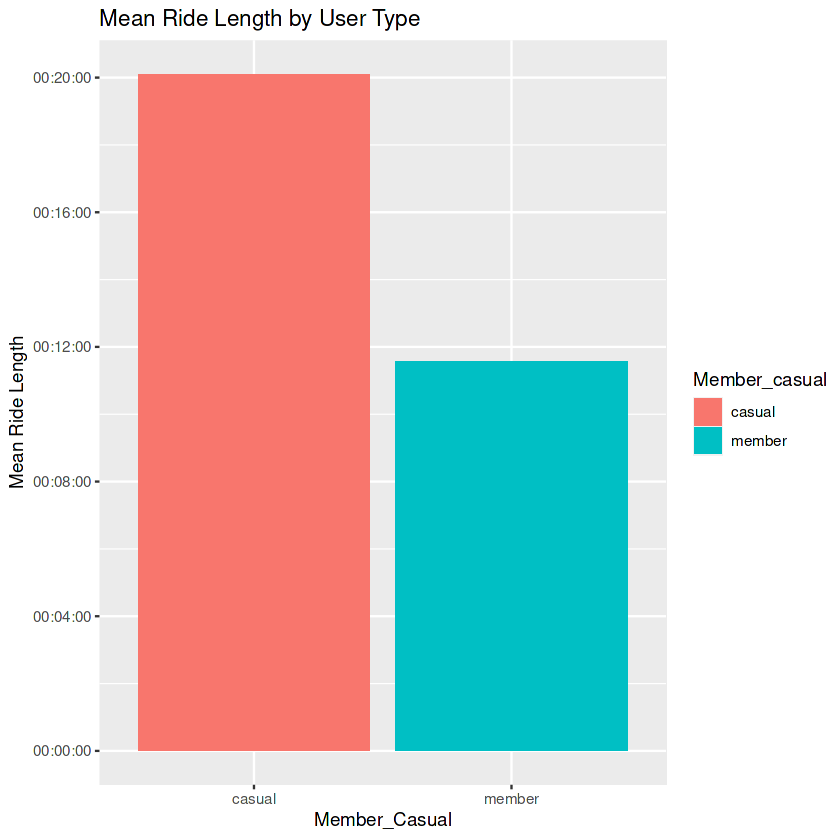

In [10]:
#Get the mean ride length for each user type member and casual
mean_ride_length_by_user <- trip_subdata %>%
  group_by(member_casual) %>%
  summarise(mean_ride_length = hms::hms(seconds = mean(ride_length_seconds,na.rm = TRUE)))

print(mean_ride_length_by_user)

{ggplot(mean_ride_length_by_user, aes(x = member_casual,
                                      y = mean_ride_length, fill = member_casual)) +
    geom_col() +
    labs(title = "Mean Ride Length by User Type", x = "Member_Casual", y = "Mean Ride Length",
         fill = "Member_casual")}

# A tibble: 2 × 2
  member_casual num_rides
  <chr>             <int>
1 casual          2081306
2 member          3331725


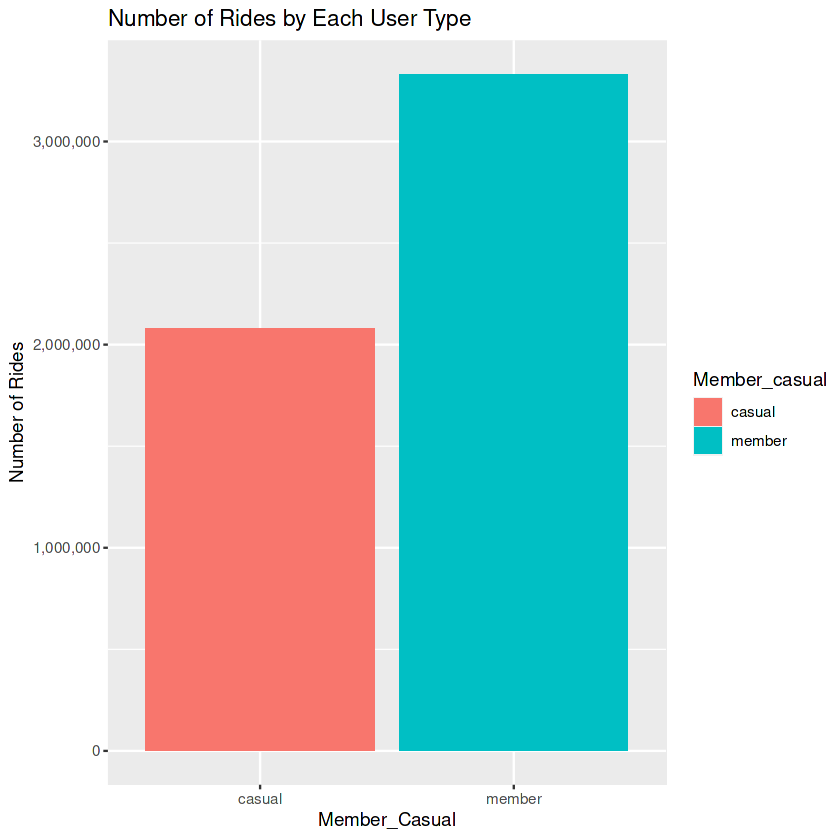

In [11]:
#Get the number of rides each user type member and casual
num_rides_by_user <- trip_subdata %>%
  group_by(member_casual) %>%
  summarise(num_rides = n())

print(num_rides_by_user)

{ggplot(num_rides_by_user, aes(x=member_casual, y=num_rides, fill=member_casual)) +
    geom_col() + 
    labs(title = "Number of Rides by Each User Type",x = "Member_Casual", y = "Number of Rides",
         fill= "Member_casual") +
    scale_y_continuous(labels = comma_format())
    }

**Checking to see how members and casual users ride length and number of rides differ each day.**

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


# A tibble: 14 × 3
# Groups:   day_of_week [7]
   day_of_week member_casual mean_ride_length
   <ord>       <chr>         <time>          
 1 Sun         casual        17'35.441015"   
 2 Sun         member        10'57.809139"   
 3 Mon         casual        17'13.611542"   
 4 Mon         member        11'02.677923"   
 5 Tue         casual        17'32.405101"   
 6 Tue         member        11'06.995715"   
 7 Wed         casual        19'18.883206"   
 8 Wed         member        11'26.617363"   
 9 Thu         casual        23'04.213707"   
10 Thu         member        13'05.158774"   
11 Fri         casual        23'16.902182"   
12 Fri         member        12'51.408377"   
13 Sat         casual        19'56.850321"   
14 Sat         member        10'59.295712"   


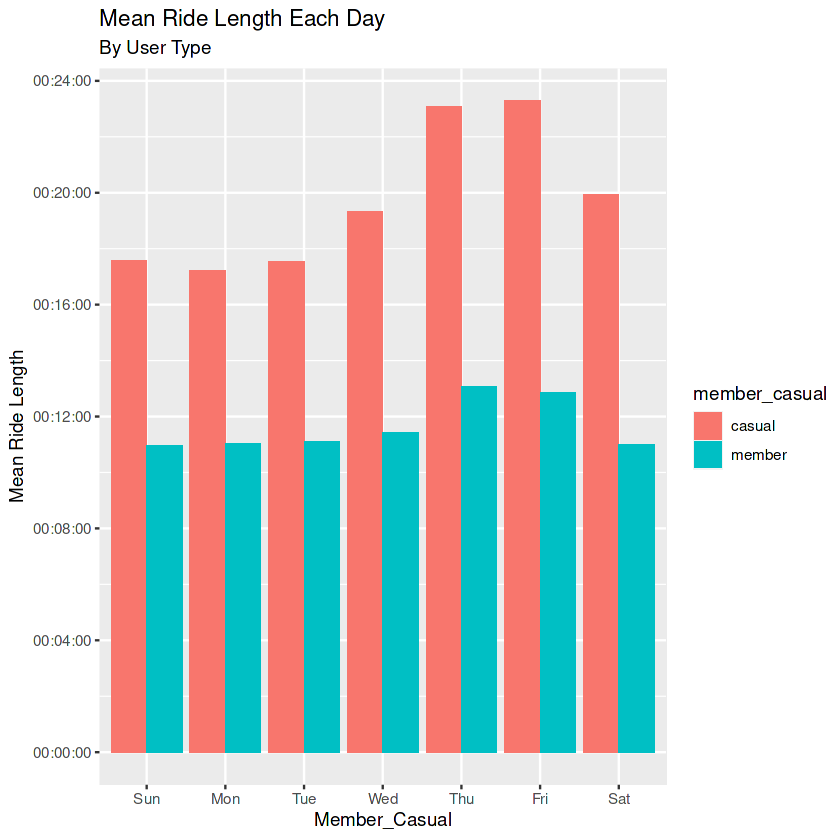

In [12]:
#Get the mean ride_length for each day by user type
user_mean_ride_length_per_day <- trip_subdata %>%
  group_by(day_of_week = weekdays(day_of_week),member_casual) %>%
  summarise(mean_ride_length = hms::hms(seconds = mean(ride_length_seconds,na.rm = TRUE)))

print(user_mean_ride_length_per_day)

{ggplot(user_mean_ride_length_per_day, aes(x=day_of_week,y=mean_ride_length,fill=member_casual, 
                                           group=member_casual)) + geom_col(position = "dodge") +
    labs(title = "Mean Ride Length Each Day", subtitle = "By User Type",x ="Member_Casual", y="Mean Ride Length",
         fill ="member_casual")}


`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


# A tibble: 14 × 3
# Groups:   day_of_week [7]
   day_of_week member_casual num_of_ride
   <ord>       <chr>               <int>
 1 Sun         casual             233391
 2 Sun         member             512936
 3 Mon         casual             253657
 4 Mon         member             535273
 5 Tue         casual             279406
 6 Tue         member             538222
 7 Wed         casual             321449
 8 Wed         member             490692
 9 Thu         casual             430088
10 Thu         member             439242
11 Fri         casual             329568
12 Fri         member             367239
13 Sat         casual             233747
14 Sat         member             448121


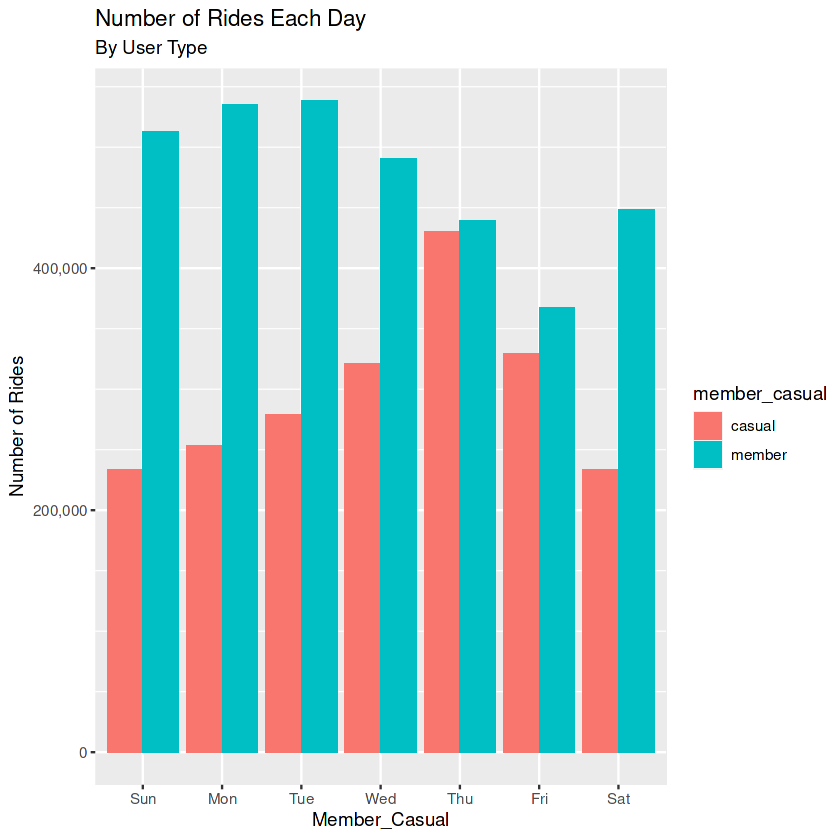

In [13]:
#Get the number of rides each day by user type
num_of_user_rides_each_day <- trip_subdata %>%
  group_by(day_of_week = weekdays(day_of_week), member_casual) %>%
  summarise(num_of_ride = n())

print(num_of_user_rides_each_day)

{ggplot(num_of_user_rides_each_day, aes(x=day_of_week, y=num_of_ride,fill=member_casual), group= member_casual) +
    geom_col(position = "dodge") +
    labs(title = "Number of Rides Each Day", subtitle = "By User Type",x ="Member_Casual", y="Number of Rides",
         fill ="member_casual") +
    scale_y_continuous(minor_breaks = scales::pretty_breaks(n = 10), labels = comma_format())}

**Checking to see how members and casual users ride length and number of rides differ each month.**

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


# A tibble: 24 × 3
# Groups:   month [12]
   month member_casual mean_ride_length
   <ord> <chr>         <time>          
 1 Jan   casual        13'12.553106"   
 2 Jan   member        09'34.733501"   
 3 Feb   casual        15'31.932824"   
 4 Feb   member        09'58.559459"   
 5 Mar   casual        14'51.996649"   
 6 Mar   member        09'42.426442"   
 7 Apr   casual        20'13.282218"   
 8 Apr   member        10'58.375051"   
 9 May   casual        21'40.291575"   
10 May   member        12'04.487207"   
11 Jun   casual        21'16.595851"   
12 Jun   member        12'21.844380"   
13 Jul   casual        23'10.563894"   
14 Jul   member        13'25.413629"   
15 Aug   casual        21'22.851598"   
16 Aug   member        12'35.814241"   
17 Sep   casual        19'33.319355"   
18 Sep   member        12'08.063232"   
19 Oct   casual        17'58.781408"   
20 Oct   member        11'02.669310"   
21 Nov   casual        15'03.294258"   
22 Nov   member        10'22.007995"  

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


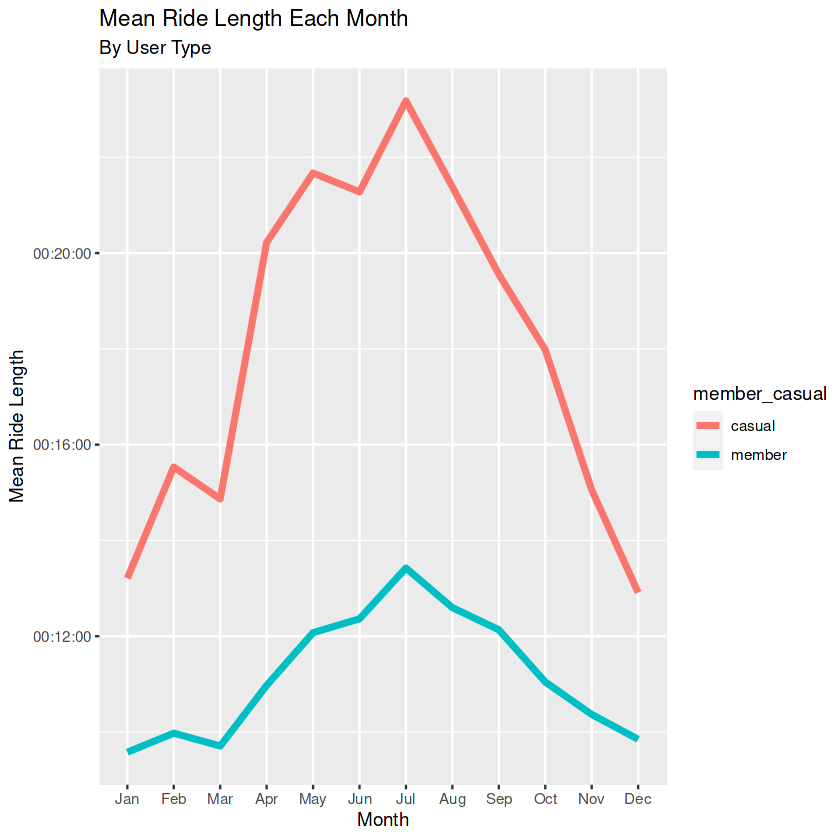

In [14]:
#Get the mean of ride length by user type for each month
mean_rides_each_month_by_user <- trip_subdata %>%
  group_by(month = month(mdy_hm(started_at),label=TRUE),member_casual) %>%
  summarize(mean_ride_length = hms::hms(seconds = mean(ride_length_seconds, na.rm = TRUE)))

print(mean_rides_each_month_by_user,n=24)

{ggplot(mean_rides_each_month_by_user, aes(x=month, y=mean_ride_length,group=member_casual,color=member_casual)) +
    geom_line(size=1.5) +
    labs(title = "Mean Ride Length Each Month", subtitle = "By User Type",x ="Month", y="Mean Ride Length",
         fill ="member_casual")}

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


# A tibble: 24 × 3
# Groups:   month [12]
   month member_casual num_rides
   <ord> <chr>             <int>
 1 Jan   casual            40008
 2 Jan   member           150293
 3 Feb   casual            43016
 4 Feb   member           147429
 5 Mar   casual            62201
 6 Mar   member           196477
 7 Apr   casual           147285
 8 Apr   member           279305
 9 May   casual           234181
10 May   member           370646
11 Jun   casual           301230
12 Jun   member           418388
13 Jul   casual           406055
14 Jul   member           417433
15 Aug   casual           195978
16 Aug   member           223541
17 Sep   casual           296697
18 Sep   member           404642
19 Oct   casual           208989
20 Oct   member           349696
21 Nov   casual           100772
22 Nov   member           236963
23 Dec   casual            44894
24 Dec   member           136912


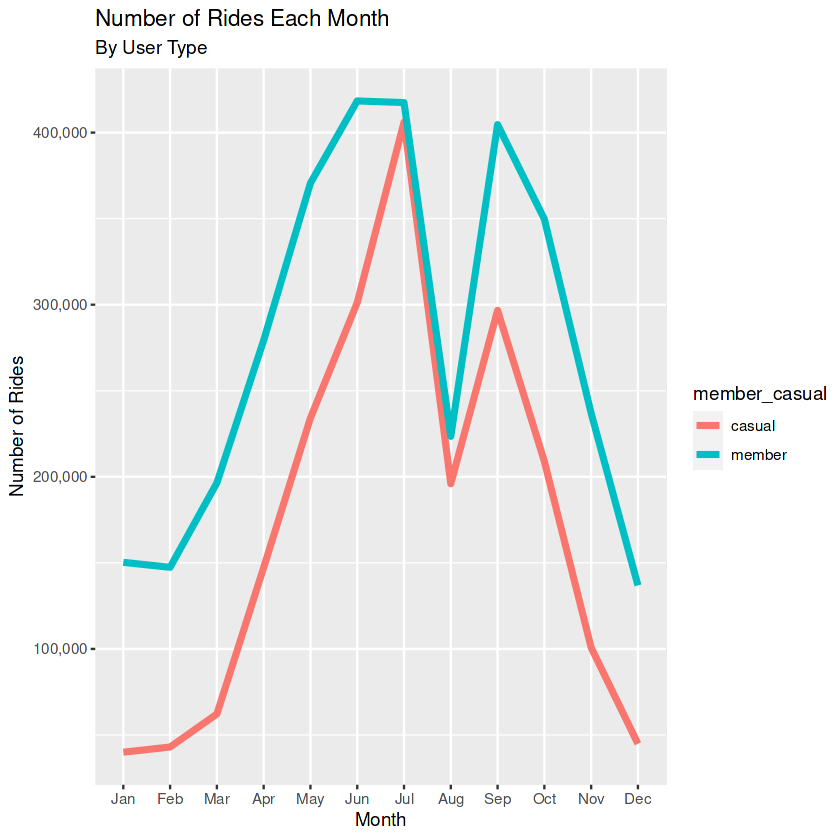

In [15]:
#Get the number of rides by user type for each month
num_rides_each_month_by_user <- trip_subdata %>%
  group_by(month = month(mdy_hm(started_at),label=TRUE),member_casual) %>%
  summarize(num_rides = n())

print(num_rides_each_month_by_user,n=24)

{ggplot(num_rides_each_month_by_user, aes(x=month, y=num_rides,group=member_casual,color=member_casual)) +
    geom_line(size=1.5) +
    labs(title = "Number of Rides Each Month", subtitle = "By User Type",x ="Month", y="Number of Rides",
         fill ="member_casual") +
    scale_y_continuous(labels = comma_format())}

**Checking to see how members and casual users ride length and number of rides differ for the three different bike type.**

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


# A tibble: 5 × 3
# Groups:   rideable_type [3]
  rideable_type member_casual mean_ride_length
  <chr>         <chr>         <time>          
1 classic_bike  casual        23'48.650457"   
2 classic_bike  member        12'33.855372"   
3 docked_bike   casual        50'32.666744"   
4 electric_bike casual        14'31.442101"   
5 electric_bike member        10'38.683734"   


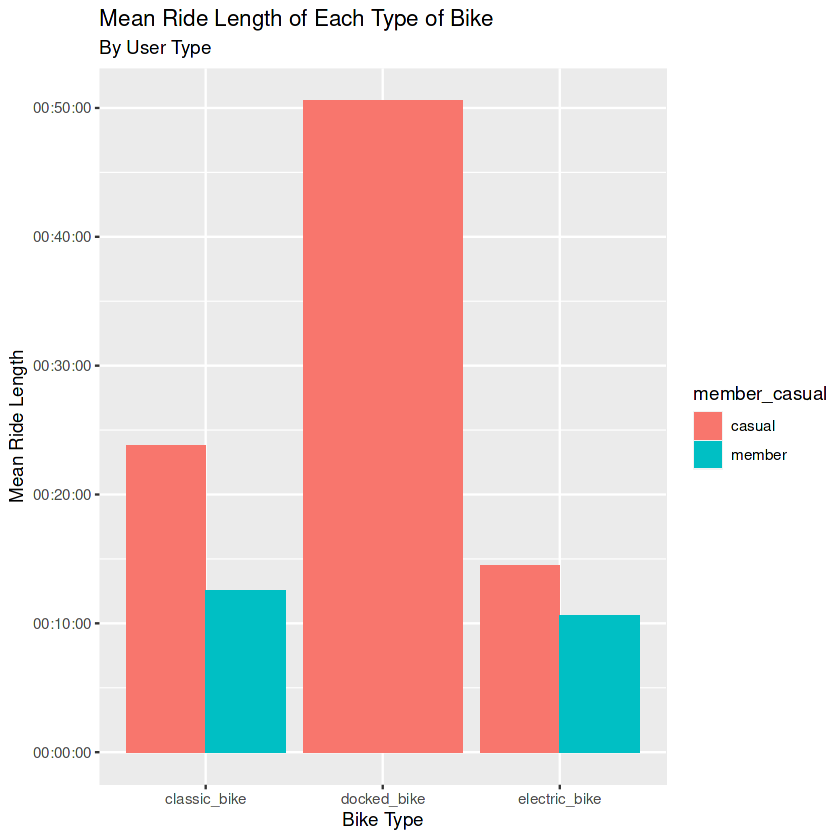

In [16]:
#Get mean of ride length for each bicycle by user type
bicycle_type_mean_by_user <- trip_subdata %>%
  group_by(rideable_type,member_casual) %>%
  summarise(mean_ride_length = hms::hms(seconds = mean(ride_length_seconds, na.rm = TRUE)))

print(bicycle_type_mean_by_user)

{ggplot(bicycle_type_mean_by_user, aes(x=rideable_type, y=mean_ride_length, group=member_casual,fill=member_casual)) +
    geom_col(position = "dodge") +
    labs(title = "Mean Ride Length of Each Type of Bike", subtitle = "By User Type",x ="Bike Type", y="Mean Ride Length",
         fill ="member_casual")}

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


# A tibble: 5 × 3
# Groups:   rideable_type [3]
  rideable_type member_casual num_rides
  <chr>         <chr>             <int>
1 classic_bike  casual           749029
2 classic_bike  member          1595589
3 docked_bike   casual           130896
4 electric_bike casual          1201381
5 electric_bike member          1736136


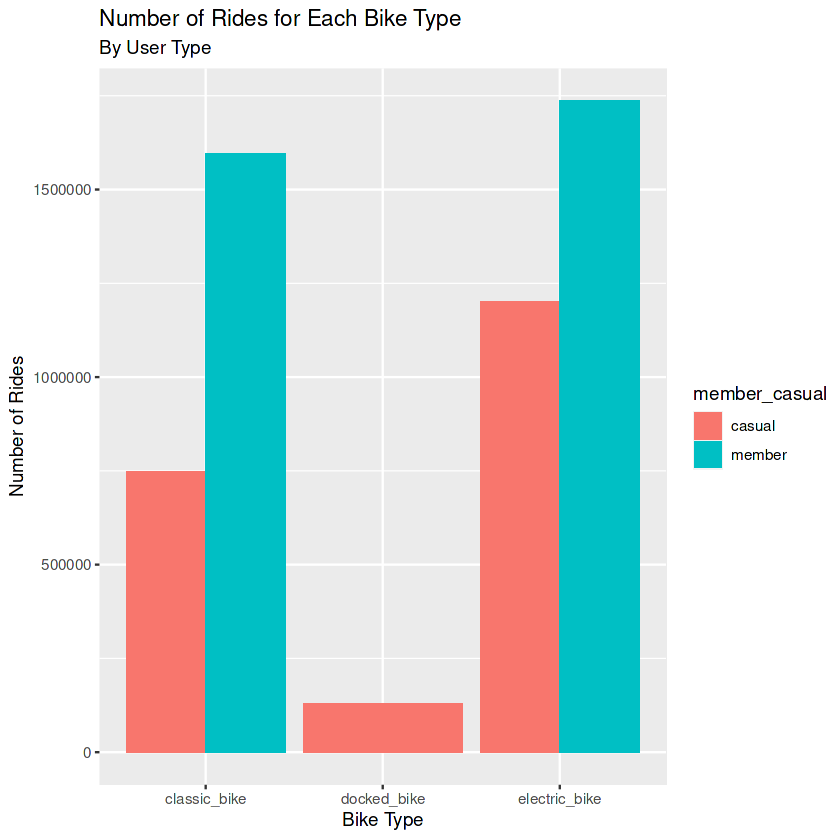

In [17]:
#Get number of rides for each bicycle by user type
bicycle_type_rides <- trip_subdata %>%
  group_by(rideable_type,member_casual) %>%
  summarise(num_rides = n())

print(bicycle_type_rides)

{ggplot(bicycle_type_rides, aes(x=rideable_type, y=num_rides, group=member_casual,fill=member_casual)) +
    geom_col(position = "dodge") +
    labs(title = "Number of Rides for Each Bike Type", subtitle = "By User Type",x ="Bike Type", y="Number of Rides",
         fill ="member_casual")}


**Checking the number of rides a member and casusal user take each hour to see how they differ.**

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


# A tibble: 48 × 3
# Groups:   hour [24]
    hour member_casual num_rides
   <int> <chr>             <int>
 1     0 casual            39665
 2     0 member            34108
 3     1 casual            26022
 4     1 member            20924
 5     2 casual            15848
 6     2 member            12148
 7     3 casual             9183
 8     3 member             7629
 9     4 casual             6404
10     4 member             8325
11     5 casual            11331
12     5 member            30922
13     6 casual            29290
14     6 member            94509
15     7 casual            50323
16     7 member           174381
17     8 casual            67908
18     8 member           215086
19     9 casual            68019
20     9 member           147870
21    10 casual            84834
22    10 member           135596
23    11 casual           109174
24    11 member           160344
25    12 casual           129706
26    12 member           183365
27    13 casual           136939
28

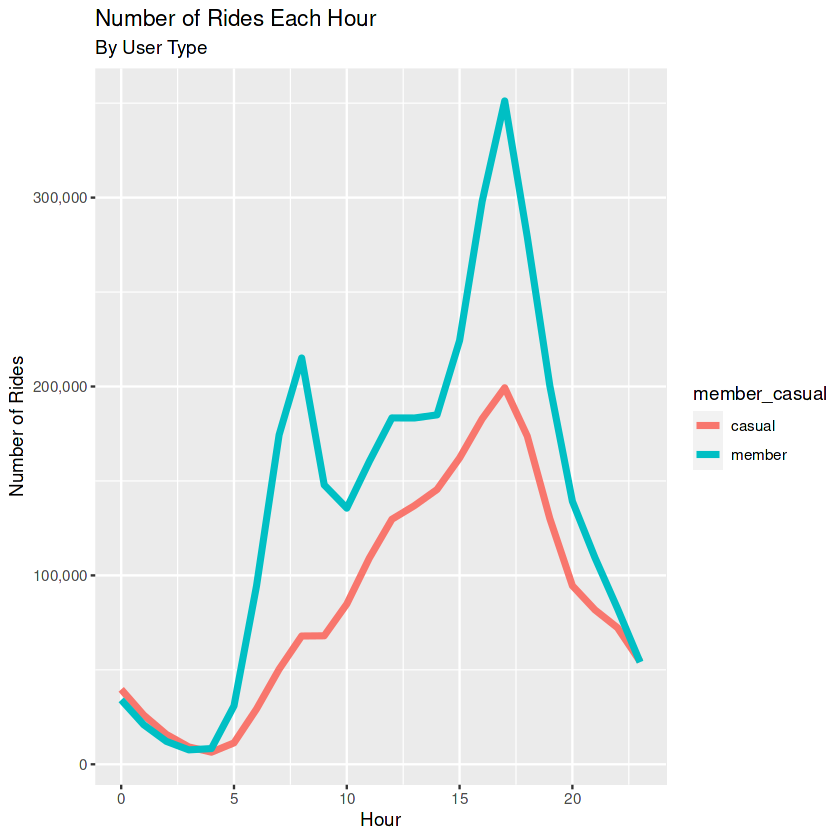

In [18]:
#Get number of rides by user for each hour
num_rides_each_hour <- trip_subdata %>%
  group_by(hour = hour(mdy_hm(started_at)),member_casual) %>%
  summarise(num_rides = n())

print(num_rides_each_hour,n=48)

{ggplot(num_rides_each_hour, aes(x=hour, y=num_rides, group=member_casual,fill=member_casual,color=member_casual)) +
    geom_line(size =1.5) +
    labs(title = "Number of Rides Each Hour", subtitle = "By User Type",x ="Hour", y="Number of Rides",
         fill ="member_casual") +
    scale_y_continuous(labels = comma_format())}

**Checking to see how members and casual users ride length and number of rides differ during each season.**

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


# A tibble: 8 × 4
# Groups:   season [4]
  season member_casual mean_ride_length num_of_rides
  <chr>  <chr>         <time>                  <int>
1 Fall   casual        18'15.875786"          606458
2 Fall   member        11'19.643082"          991301
3 Spring casual        20'14.163642"          443667
4 Spring member        11'09.691499"          846428
5 Summer casual        22'09.182389"          903263
6 Summer member        12'49.841164"         1059362
7 Winter casual        13'53.174618"          127918
8 Winter member        09'47.907270"          434634


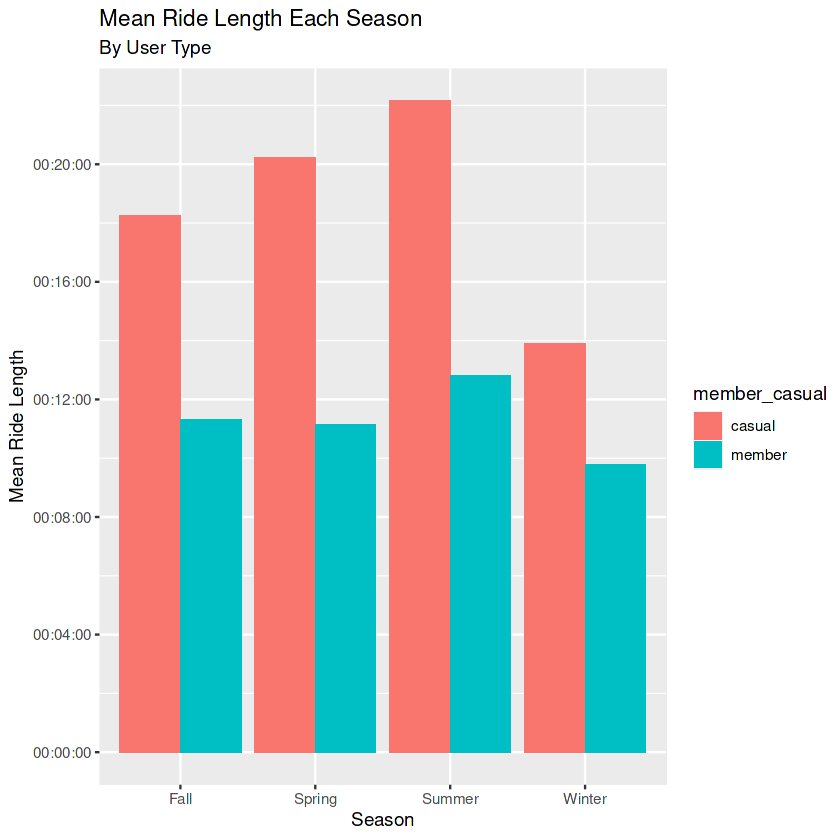

In [19]:
# Create a new column "season" based on the "started_at" date
trip_subdata <- trip_subdata %>%
  mutate(month = month(mdy_hms(started_at)),
         season = case_when(
           month %in% c(12, 1, 2) ~ "Winter",
           month %in% c(3, 4, 5) ~ "Spring",
           month %in% c(6, 7, 8) ~ "Summer",
           TRUE ~ "Fall"
         ))

# Group by "season" and "member_casual" and calculate the average ride length or number of rides
seasonal_analysis <- trip_subdata %>%
  group_by(season, member_casual) %>%
  summarise(
    mean_ride_length = hms::hms(seconds = mean(ride_length_seconds, na.rm = TRUE)),
    num_of_rides = n()
  )

print(seasonal_analysis)

{ggplot(seasonal_analysis, aes(x=season,y=mean_ride_length,fill=member_casual, group=member_casual)) + 
    geom_col(position = "dodge") +
    labs(title = "Mean Ride Length Each Season", subtitle = "By User Type",x ="Season", y="Mean Ride Length",
         fill ="member_casual")}

**Checking to see how members and casual users ride length and number of rides differ during the weekdays and weekends.**

`summarise()` has grouped output by 'weekday_weekend'. You can override using
the `.groups` argument.


# A tibble: 4 × 4
# Groups:   weekday_weekend [2]
  weekday_weekend member_casual mean_ride_length num_of_rides
  <chr>           <chr>         <time>                  <int>
1 Weekday         casual        18'20.769323"         1321650
2 Weekday         member        11'06.660712"         2525244
3 Weekend         casual        23'09.717972"          759656
4 Weekend         member        12'58.897346"          806481


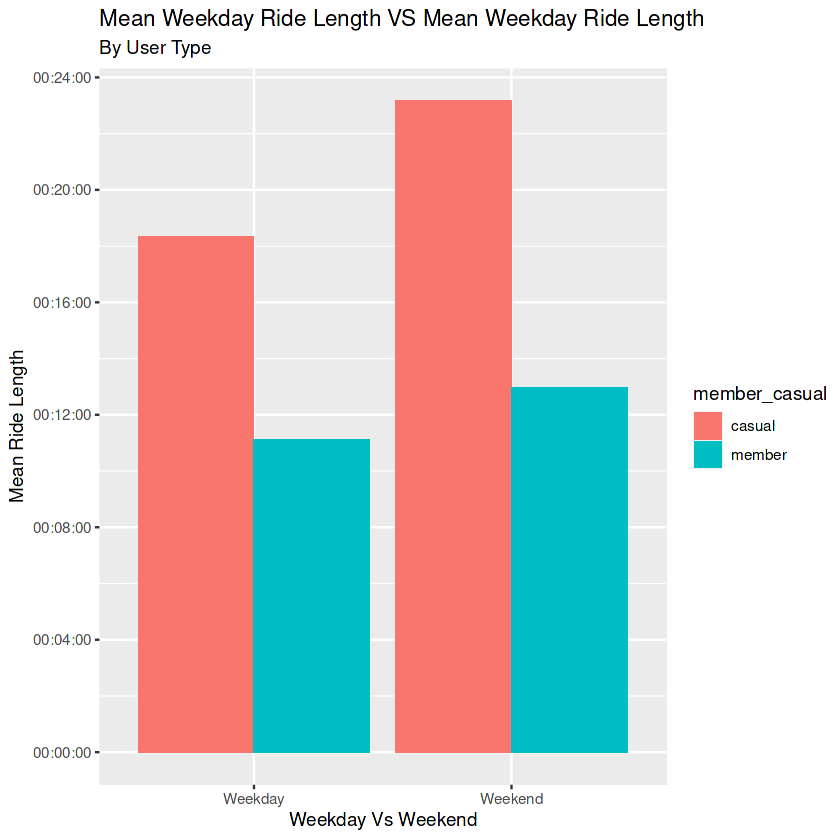

In [20]:
#Create new column "weekday_vs_weekday" based on the "started_at" date
trip_subdata <- trip_subdata %>%
  mutate(weekday_weekend = case_when(
    day_of_week %in% c(2,3,4,5,6) ~ "Weekday",
    TRUE ~ "Weekend"
  ))

weekday_vs_weekend <- trip_subdata %>%
  group_by(weekday_weekend,member_casual) %>%
  summarise(
    mean_ride_length = hms::hms(seconds = mean(ride_length_seconds, na.rm = TRUE)),
    num_of_rides = n()
  )

print(weekday_vs_weekend)


{ggplot(weekday_vs_weekend, aes(x=weekday_weekend,y=mean_ride_length,fill=member_casual, group=member_casual)) + 
    geom_col(position = "dodge") +
    labs(title = "Mean Weekday Ride Length VS Mean Weekday Ride Length ", subtitle = "By User Type",x ="Weekday Vs Weekend", y="Mean Ride Length",
         fill ="member_casual")}

#### Overall, the analysis reveals that casual and member users exhibit distinct ride behaviors, with casual users taking longer and more diverse rides, while member users take more frequent but shorter rides, primarily using electric bikes.

### END OF ANALYSIS